In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
ds=pd.read_csv('data_preprocessed.csv')

In [5]:
ds.head(5)

,Unnamed: 0,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,...,BRABANT FLAMAND,BRABANT WALLON,BRUXELLES.1,FLANDRE-OCCIDENTALE,FLANDRE-ORIENTALE,HAINAUT,LIEGE,LIMBOURG,LUXEMBOURG,NAMUR
0,0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,9890,HOUSE,MANSION,435000.0,5,452.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
ds=ds.drop('Unnamed: 0',axis=1)

In [14]:
ds.type_num.value_counts()

0    7409
1    7118
Name: type_num, dtype: int64

In [10]:
ds.columns

Index(['location', 'type', 'subtype', 'price', 'room_number', 'area',
       'kitchen_equipped', 'furnished', 'fireplace', 'terrace', 'terrace_area',
       'garden', 'garden_area', 'land_surface', 'facade_count',
       'swimming_pool', 'building_condition', 'Commune', 'Sous_Commune',
       'Commune_Principale', 'Province', 'Region', 'median_terrace_area',
       'median_garden_area', 'median_facade', 'type_num', 'APARTMENT',
       'BUNGALOW', 'CASTLE', 'CHALET', 'COUNTRY_COTTAGE', 'DUPLEX',
       'EXCEPTIONAL_PROPERTY', 'FARMHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR',
       'HOUSE', 'KOT', 'LOFT', 'MANOR_HOUSE', 'MANSION', 'OTHER_PROPERTY',
       'PENTHOUSE', 'SERVICE_FLAT', 'TOWN_HOUSE', 'TRIPLEX', 'VILLA', 'AS_NEW',
       'GOOD', 'JUST_RENOVATED', 'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE',
       'BRUXELLES', 'VLAANDEREN', 'WALLONIE', 'ANVERS', 'BRABANT FLAMAND',
       'BRABANT WALLON', 'BRUXELLES.1', 'FLANDRE-OCCIDENTALE',
       'FLANDRE-ORIENTALE', 'HAINAUT', 'LIEGE', 'LIMB

### split dataset into apartment and house

In [16]:
ds_apartment=ds[ds['type']=='APARTMENT']
ds_house=ds[ds['type']=='HOUSE']

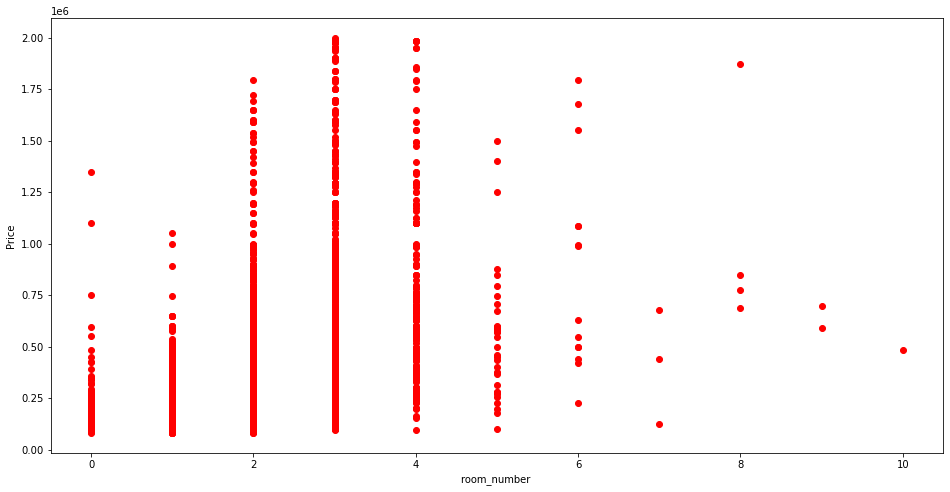

In [45]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(ds_apartment['room_number'], ds_apartment['price'], c='r')

ax.set_xlabel('room_number ')
ax.set_ylabel('Price ')

plt.show()

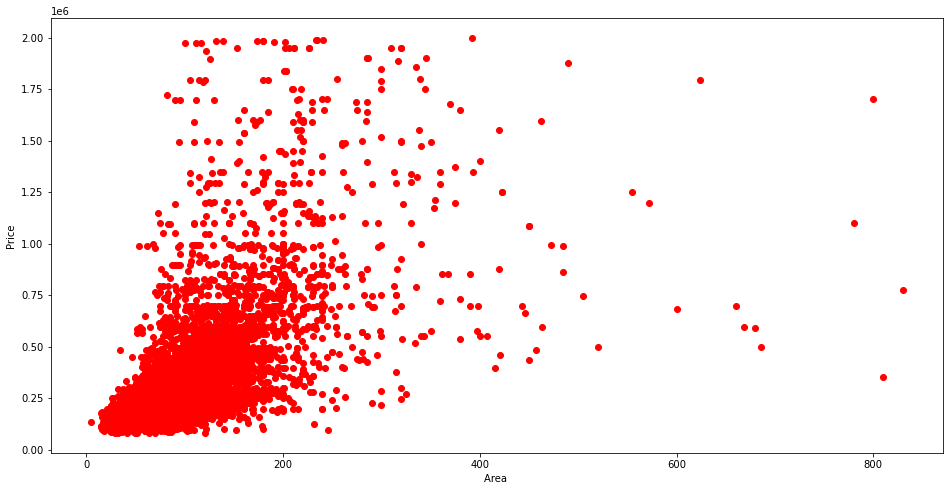

In [46]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(ds_apartment['area'], ds_apartment['price'], c='r')

ax.set_xlabel('Area ')
ax.set_ylabel('Price ')

plt.show()

In [47]:
ds_apartment_1=ds_apartment[ds_apartment.area<1000]

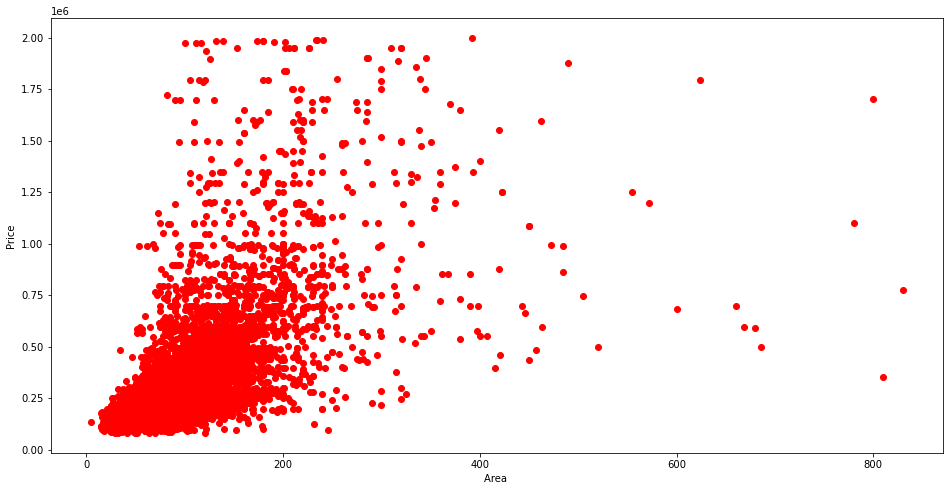

In [48]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(ds_apartment_1['area'], ds_apartment['price'], c='r')

ax.set_xlabel('Area ')
ax.set_ylabel('Price ')

plt.show()

### exclude categorical values

In [57]:
ds_apartment_n = ds_apartment.select_dtypes(exclude=['object'])
ds_house_n=ds_house.select_dtypes(exclude=['object'])

In [58]:
### without outlin
#ds_apartment_n = ds_apartment_1.select_dtypes(exclude=['object'])
#ds_house_n=ds_house.select_dtypes(exclude=['object'])

In [104]:
X_apartment_price = ds_apartment_n.drop(['location','garden_area','terrace_area','land_surface','facade_count','APARTMENT',
       'BUNGALOW', 'CASTLE', 'CHALET', 'COUNTRY_COTTAGE', 'DUPLEX',
       'EXCEPTIONAL_PROPERTY', 'FARMHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR',
       'HOUSE', 'KOT', 'LOFT', 'MANOR_HOUSE', 'MANSION', 'OTHER_PROPERTY',
       'PENTHOUSE', 'SERVICE_FLAT', 'TOWN_HOUSE', 'TRIPLEX', 'VILLA',],axis=1)

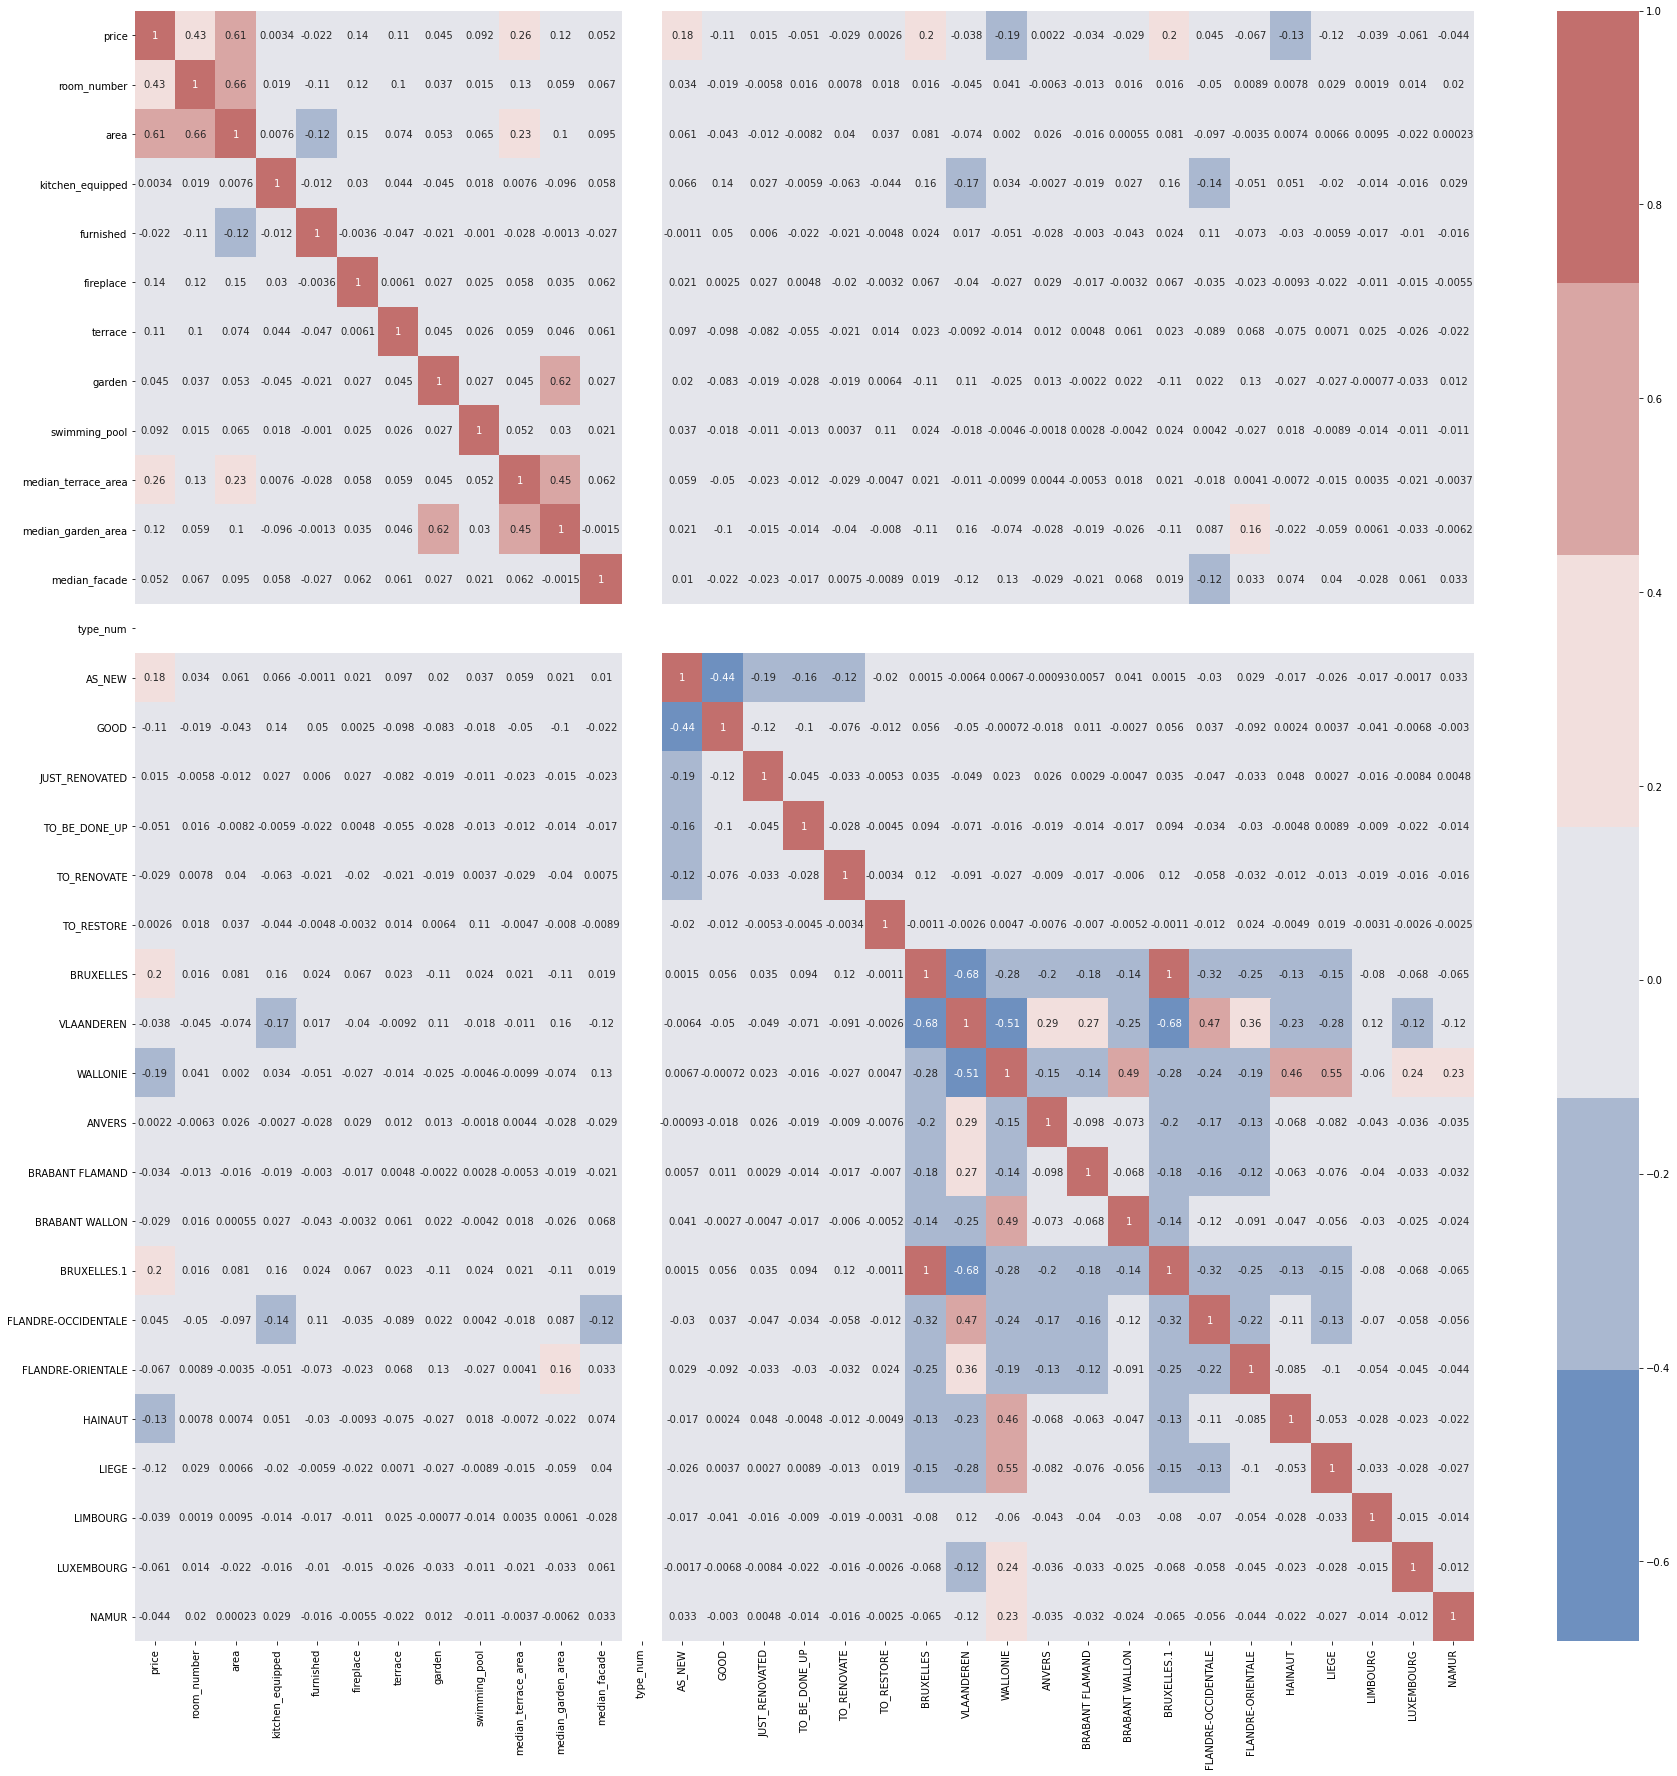

<Figure size 432x288 with 0 Axes>

In [105]:
fig,ax = plt.subplots(figsize=(30, 30)) 
plot=sns.heatmap(X_apartment_price.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

### X an y array

In [59]:
X_apartment = ds_apartment_n.drop(['location','price','garden_area','terrace_area','land_surface','facade_count'],axis=1)
y_apartment = ds_apartment['price']


X_house=ds_house_n.drop(['location','price','garden_area','terrace_area','facade_count'],axis=1)
y_house= ds_house['price']

### Train test split

In [60]:
from sklearn.model_selection import train_test_split

X_apartment_train, X_apartment_test, y_apartment_train, y_apartment_test = train_test_split(X_apartment, y_apartment, test_size=0.2, random_state=42)
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(X_house, y_house, test_size=0.2, random_state=42)

### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

reg_ap = LinearRegression(normalize=True)
reg_ap.fit(X_apartment_train,y_apartment_train)

reg_h = LinearRegression(normalize=True)
reg_h.fit(X_house_train,y_house_train)

LinearRegression(normalize=True)

In [62]:
y_pred_ap = reg_ap.predict(X_apartment_test)
y_pred_h = reg_h.predict(X_house_test)

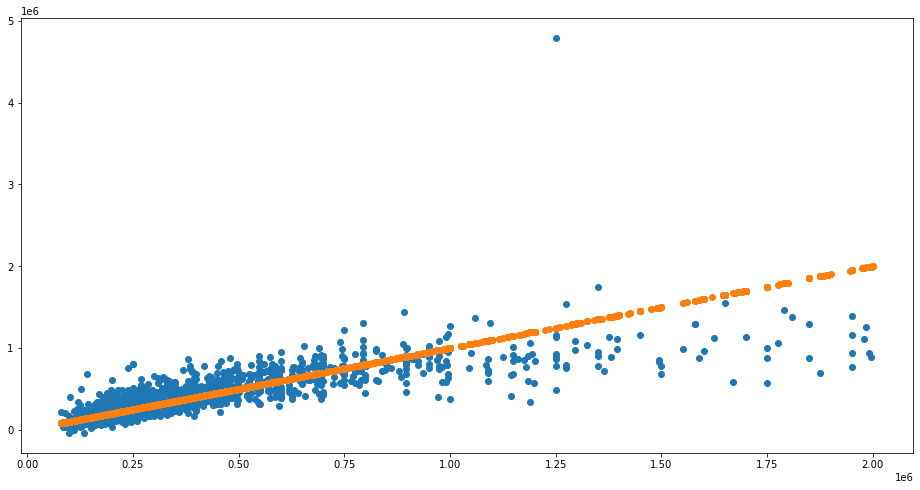

In [69]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(y_house_test, y_pred_h)
plt.scatter(y_house_train,y_house_train)
plt.show()


In [64]:
from sklearn.metrics import r2_score
score_ap=r2_score(y_apartment_test,y_pred_ap)
score_ap

0.3767886247059984

In [65]:
reg_ap.score(X_apartment_test, y_apartment_test)

0.3767886247059984

In [66]:
score_h=r2_score(y_house_test,y_pred_h)
score_h

0.5747990934045214

In [30]:
reg_h.score(X_house_test, y_house_test)

0.5741857410083485

In [72]:

#plt.scatter(X_house_train.area, y_house_train, color ='r')
#plt.plot(X_house_train.area, y_pred_h, color ='b')
  
#plt.show()

### multiple lin_regression with some features

In [106]:
#X_apartment = ds_apartment_n.drop(['location','price','garden_area','terrace_area','land_surface','facade_count'],axis=1)
X_apartment_price = ds_apartment_n.drop(['price','location','garden_area','terrace_area','land_surface','facade_count','APARTMENT',
       'BUNGALOW', 'CASTLE', 'CHALET', 'COUNTRY_COTTAGE', 'DUPLEX',
       'EXCEPTIONAL_PROPERTY', 'FARMHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR',
       'HOUSE', 'KOT', 'LOFT', 'MANOR_HOUSE', 'MANSION', 'OTHER_PROPERTY',
       'PENTHOUSE', 'SERVICE_FLAT', 'TOWN_HOUSE', 'TRIPLEX', 'VILLA',],axis=1)
X_apartment = X_apartment_price
y_apartment = ds_apartment['price']


X_house=ds_house_n.drop(['price','location','garden_area','terrace_area','land_surface','facade_count','APARTMENT',
       'BUNGALOW', 'CASTLE', 'CHALET', 'COUNTRY_COTTAGE', 'DUPLEX',
       'EXCEPTIONAL_PROPERTY', 'FARMHOUSE', 'FLAT_STUDIO', 'GROUND_FLOOR',
       'HOUSE', 'KOT', 'LOFT', 'MANOR_HOUSE', 'MANSION', 'OTHER_PROPERTY',
       'PENTHOUSE', 'SERVICE_FLAT', 'TOWN_HOUSE', 'TRIPLEX', 'VILLA',],axis=1)
y_house= ds_house['price']

In [107]:
from sklearn.model_selection import train_test_split

X_apartment_train, X_apartment_test, y_apartment_train, y_apartment_test = train_test_split(X_apartment, y_apartment, test_size=0.2, random_state=42)
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(X_house, y_house, test_size=0.2, random_state=42)

In [108]:
from sklearn.linear_model import LinearRegression

reg_ap = LinearRegression(normalize=True)
reg_ap.fit(X_apartment_train,y_apartment_train)

reg_h = LinearRegression(normalize=True)
reg_h.fit(X_house_train,y_house_train)

LinearRegression(normalize=True)

In [109]:
y_pred_ap = reg_ap.predict(X_apartment_test)
y_pred_h = reg_h.predict(X_house_test)

In [110]:
from sklearn.metrics import r2_score
score_ap=r2_score(y_apartment_test,y_pred_ap)
score_ap

0.3512858097231024

In [111]:
score_h=r2_score(y_house_test,y_pred_h)
score_h

0.648786209656721

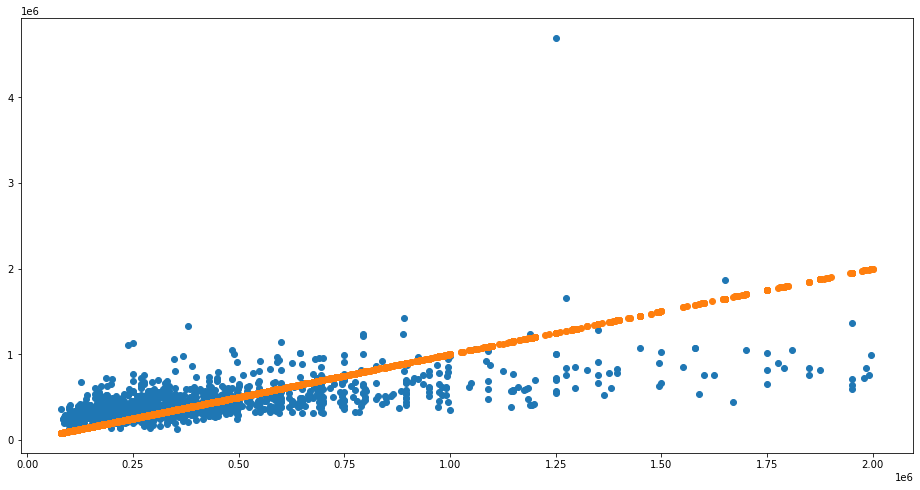

In [95]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(y_house_test, y_pred_h)
plt.scatter(y_house_train,y_house_train)
plt.show()
